In [1]:
import pymuqModeling as mm
import pymuqApproximation as ma

import numpy as np
import matplotlib.pyplot as plt
import h5py

## Load model discretization
Note that the model itself is not needed.

In [2]:
modFile = h5py.File('PaleoTempModel.h5','r')

ts = modFile['/Model/ts']
zs = modFile['/Model/zs']

Nt = ts.size
ts = np.reshape(np.array(ts), (1,Nt))


## Define the Gaussian Process over air temperature

In [3]:
posDim = 1  # How many components does the time vector contain?
fieldDim = 1 # How many components does the temperature field contain?

mean = ma.LinearMean(np.zeros((1,posDim)), -4.5*np.ones(1))

var = 4.0 # Marginal Variance
length = 40 # Lengthscale of the kernel

kern = ma.SquaredExpKernel(posDim, var, length)

gp = ma.GaussianProcess(mean, kern)

### Plot a few samples of the temperature GP

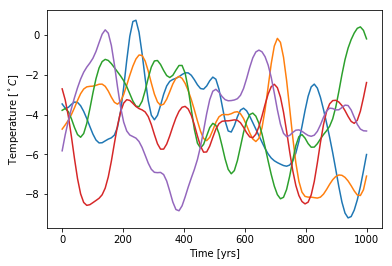

In [4]:

numSamps = 5
for i in range(numSamps):
    samp = gp.Sample(ts)
    plt.plot(ts[0,:], samp[0,:])
    
plt.xlabel('Time [yrs]')
plt.ylabel('Temperature [$^\circ C$]')

plt.show()


## Discretize the GP

In [5]:
gaussPrior = gp.Discretize(ts)

### Write the results to file

In [6]:
priorFile = h5py.File('PaleoTempPrior.h5','w')

priorFile['/PriorDist/Mean'] = gaussPrior.GetMean()
priorFile['/PriorDist/Covariance'] = gaussPrior.GetCovariance()

priorFile['/PriorDist'].attrs['KernelType'] = 'RBF'
priorFile['/PriorDist'].attrs['Variance'] = var
priorFile['/PriorDist'].attrs['Lengthscale'] = length

priorFile.close()